In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
data = pd.merge(city_data,ride_data, on = 'city')
# Display the data table for preview
data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

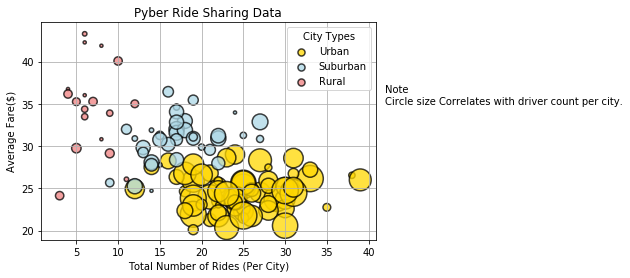

In [2]:
# Obtain the x and y coordinates for each of the three city types
#y axis
city_types = data['type'].unique()

mean_fare = [data[data['type'] == x].groupby(['city'])['fare'].mean() for x in city_types]

# x axis
rides_city = [data[data['type'] == x].groupby(['city']).count()['ride_id'] for x in city_types]

#driver count
driver_count = [data[data['type'] == x].groupby(['city']).mean()['driver_count'] for x in city_types]

# Build the scatter plots for each city types
fig, bub = plt.subplots()
colors = ['gold','lightblue','lightcoral']
for x in range(len(rides_city)):
    bub.scatter(rides_city[x],mean_fare[x],
               alpha = 0.75,
               c = colors[x],
               s = 10*driver_count[x],
               linewidths = 1.5,
               edgecolors = 'black',
               label = city_types[x])

# Incorporate the other graph properties
bub.grid()
bub.set_title('Pyber Ride Sharing Data')
bub.set_xlabel('Total Number of Rides (Per City)')
bub.set_ylabel('Average Fare($)')

# Create a legend
leg = bub.legend(title = 'City Types')
leg.legendHandles[0]._sizes = [50]
leg.legendHandles[1]._sizes = [50]
leg.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
bub.text(42,35, 'Note \nCircle size Correlates with driver count per city.')

# Save Figure and Show
plt.savefig('Plots/Pyber Ride Sharing Data.png')
plt.show()

## Total Fares by City Type

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64


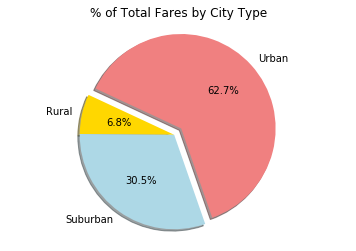

In [3]:
# Calculate Type Percents
total_fare = data['fare'].sum()
fare_type = data.groupby('type')['fare'].sum()
fare_perc = fare_type / total_fare*100
print(fare_perc)
# Build Pie Chart
plt.pie(fare_perc,
        labels = fare_perc.index,
        autopct = '%1.1f%%',
        startangle = 155,
        explode = [0,0,.1], 
        shadow = True,
        colors = ['gold','lightblue','lightcoral'])
plt.axis('equal')
plt.title("% of Total Fares by City Type")

# Save Figure and Plot
plt.savefig('Plots/% of Total Fares by City Type.png')
plt.show()

## Total Rides by City Type

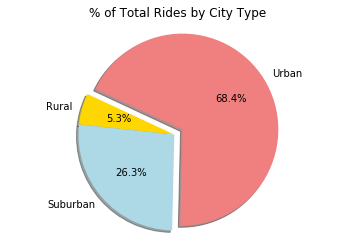

In [4]:
# Calculate Rides Percents
total_ride = len(data)
ride_type = data.groupby('type').count()['ride_id']
ride_perc = ride_type / total_ride * 100

# Build Pie Chart
plt.pie(ride_perc,
        labels = ride_perc.index,
        autopct = '%1.1f%%',
        startangle = 155,
        explode = [0,0,.1], 
        shadow = True,
        colors = ['gold','lightblue','lightcoral'])

plt.axis('equal')
plt.title("% of Total Rides by City Type")

# Save Figure and Plot
plt.savefig('Plots/% of Total Rides by City Type.png')
plt.show()

## Total Drivers by City Type

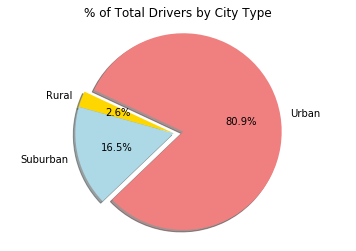

In [5]:
# Calculate Driver Percents
total_driver = data.drop_duplicates('city')['driver_count'].sum().sum()
driver_type = data.drop_duplicates('city').groupby('type')['driver_count'].sum()
driver_perc = driver_type / total_driver * 100

# Build Pie Chart
plt.pie(driver_perc,
        labels = driver_perc.index,
        autopct = '%1.1f%%',
        startangle = 155,
        explode = [0,0,.1], 
        shadow = True,
        colors = ['gold','lightblue','lightcoral'])

plt.axis('equal')
plt.title("% of Total Drivers by City Type")

# Save Figure and Plot
plt.savefig('Plots/% of Total Drivers by City Type.png')
plt.show()

Observations

1. Most Drivers and money made is in urban zones.
2. Suburban drivers have more rides proportional to urban drivers
3. Rural zones take to have higher fares.